In [62]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
from matplotlib import pyplot as plt


# Q1

In [ ]:
df= pd.read_csv('Downloads/Ms Excel/complaints.csv', 
                nrows=2000000,low_memory=False) #used nrows to import 20L rows . Because of memory errors.

In [26]:
df.describe()

,Complaint ID
count,2.000000e+06
mean,6.803500e+06
std,1.963783e+06
min,5.000000e+00
25%,6.222981e+06
50%,7.466023e+06
75%,8.281885e+06
max,8.944512e+06


In [28]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268
2,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
3,2024-02-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am disappointed to have received a credit re...,NaN,LEXISNEXIS,CA,94124,NaN,Consent provided,Web,2024-02-20,Closed with explanation,Yes,NaN,8379830
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,2018-09-09,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,"Managing, opening, or closing your mobile wall...",NaN,NaN,NaN,"Paypal Holdings, Inc",VA,22153,NaN,Consent not provided,Web,2018-09-09,Closed with explanation,Yes,NaN,3014049
1999996,2021-09-10,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,"EQUIFAX, INC.",VA,23504,NaN,Consent not provided,Web,2021-09-10,Closed with explanation,Yes,NaN,4709953
1999997,2019-04-15,Debt collection,I do not know,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,I request the original disclosure of my loan (...,Company believes complaint caused principally ...,Express Cash Mart Management,TX,78249,NaN,Consent provided,Web,2019-04-24,Closed with explanation,Yes,NaN,3212585
1999998,2021-10-14,Credit card or prepaid card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,NaN,NaN,Synovus Bank,NJ,07524,NaN,Consent not provided,Web,2021-10-14,Closed with explanation,Yes,NaN,4808988


In [31]:
df.columns #displaying all columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [45]:
df['Timely response?'].unique()  #unique values in Timely response column

array(['Yes', 'No'], dtype=object)

In [48]:
df['Consumer disputed?'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [61]:
Count_of_timely_response = df['Timely response?'].value_counts()
print(Count_of_timely_response)


Yes    1986745
No       13255
Name: Timely response?, dtype: int64


# # Percentage of Timely Responses

In [63]:
total_count = Count_of_timely_response.sum()                             
percentage_yes = (Count_of_timely_response['Yes'] / total_count) * 100
percentage_no = (Count_of_timely_response['No'] / total_count) * 100

print("Percentage of 'Yes' responses:=", percentage_yes,"%")
print(f"Percentage of 'No' responses:=", percentage_no,"%")

Percentage of 'Yes' responses:= 99.33725 %
Percentage of 'No' responses:= 0.66275 %


Text(0.5, 1.0, 'Consumer Disputed Distribution')

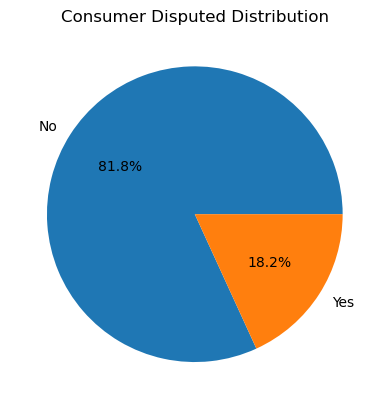

In [67]:
counts = df['Consumer disputed?'].value_counts()
plt.pie(counts, labels=counts.index,autopct='%1.1f%%')
plt.title("Consumer Disputed Distribution")


# Q2

In [70]:
def findLength(nums):
    if not nums:
        return 0

    max_length = 1  
    current_length = 1  
    
    for i in range(1, len(nums)):
        if nums[i] > nums[i - 1]:   # Check if the current number is greater than the previous one
            current_length += 1     # If it is, increase the length of the current increasing subsequence
            max_length = max(max_length, current_length)
        else:
            
            current_length = 1

    return max_length



In [74]:
nums = [1,2,5,3,6,7,8]
print(findLength(nums))

4


#  Q3

In [83]:
def largestNumber(nums):
    # Convert numbers to strings
    nums_as_strings = []
    for num in nums:
        nums_as_strings.append(str(num))
    
    # Sort the numbers based on custom comparator
    for i in range(len(nums_as_strings)):
        for j in range(i + 1, len(nums_as_strings)):
            if nums_as_strings[i] + nums_as_strings[j] < nums_as_strings[j] + nums_as_strings[i]:
                nums_as_strings[i], nums_as_strings[j] = nums_as_strings[j], nums_as_strings[i]
    
    # Combine sorted strings to form the largest number
    largest_num = ''.join(nums_as_strings)
    
    # Check if the largest number is '0'
    if largest_num[0] == '0':
        return '0'
    
    return largest_num


In [85]:
nums =[2,20,13]
print(largestNumber(nums))

22013


# Q4

In [87]:
import json
import csv

# Read JSON file
with open('Downloads/Ms Excel/DT A1 sample_json.json', 'r') as f:
    data = json.load(f)

# Extract "servlet-name" and "servlet-class" from each entry
servlet_data = []
for servlet in data['web-app']['servlet']:
    servlet_name = servlet['servlet-name']
    servlet_class = servlet['servlet-class']
    servlet_data.append({'servlet-name': servlet_name, 'servlet-class': servlet_class})

# Write to CSV file
with open('servlet_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['servlet-name', 'servlet-class']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for servlet in servlet_data:
        writer.writerow(servlet)

